In [2]:
#Lib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

#Modelling
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [3]:
#Intializng The datas as df 
df=pd.read_csv("data/StudentsPerformance.csv")

In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


## Preparing X and y Variables

In [6]:
X=df.drop(columns=['math score'],axis=1)

In [7]:
y=df['math score']

In [13]:
#Column Transformer with 3 types of transformers
num_feat=X.select_dtypes(exclude="object").columns
cat_feat=X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
ohe_tran=OneHotEncoder()
stdsc_trans=StandardScaler()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder",ohe_tran,cat_feat),
        ("StandardScaler",stdsc_trans,num_feat),
    ]
) 

in the above :
1. we taken the numerical and categorical as seperate as variable
2. taking OneHotEncoder and StandardScaler and ColumnTransformer
3. OHE which encoe the  categorical into numberical 
4. std which standard's the numerical values
5. using ColumnTransformer make combine this both process runs parallely like OHE for cat and STD for num and then combines into preprocessor 

In [14]:
X=preprocessor.fit_transform(X)

In [16]:
X

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]], shape=(1000, 19))

In [15]:
X.shape

(1000, 19)

In [18]:
#Spliting Train & Testing the datas
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((800, 19), (200, 19))

## Creating Evalution Models DEF  

In [30]:
def eval_model(true,predicted):
    mae=mean_absolute_error(true,predicted)
    mse=mean_squared_error(true,predicted)
    rmse=np.sqrt(mse)
    r2_scored=r2_score(true,predicted)
    return mse,mae,rmse,r2_scored

## Creating Optimized Code for All Models 

In [32]:
models={
    "LinearRegression" : LinearRegression(),
    "Lasso" : Lasso(),
    "Ridge" : Ridge(),
    "K-Neighbors Regressor" : KNeighborsRegressor(),
    "Decision Tree Regressor" : DecisionTreeRegressor(),
    "Random Forest Regressor" : RandomForestRegressor(),
    "Support Vector Regressor" : SVR(),
    "Ada Boost Regressor" : AdaBoostRegressor(),
    "XGBRegressor" : XGBRegressor(),
    "Cat Boost Regressor" : CatBoostRegressor(),

}

model_list = []
r2_list = []

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train) #Training The Model

    #Making Predictions
    y_train_predict=model.predict(X_train)
    y_test_predict=model.predict(X_test)

    #Evaluating The Model
    model_train_mae,model_train_mse,model_train_rmse,model_train_r2_score=eval_model(y_train,y_train_predict)

    model_test_mae,model_test_mse,model_test_rmse,model_test_r2_score=eval_model(y_test,y_test_predict)


    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print("Model Performance for Train Set")
    print("- Root Mean Squared Error : {:.4f}".format(model_train_rmse))
    print("- Mean Squared Error : {:.4f}".format(model_train_mse))
    print("- Mean Absolute Error : {:.4f}".format(model_train_mae))
    print("- R2_Score : {:.4f}".format(model_train_r2_score))

    print("-------------------------------------------------------------")

    print("Model Performance for Test Set")
    print("- Root Mean Squared Error : {:.4f}".format(model_test_rmse))
    print("- Mean Squared Error : {:.4f}".format(model_test_mse))
    print("- Mean Absolute Error : {:.4f}".format(model_test_mae))
    print("- R2_Score : {:.4f}".format(model_test_r2_score))

    r2_list.append(model_test_r2_score)


    print("="*46)
    print("\n")



LinearRegression
Model Performance for Train Set
- Root Mean Squared Error : 5.3231
- Mean Squared Error : 4.2667
- Mean Absolute Error : 28.3349
- R2_Score : 0.8743
-------------------------------------------------------------
Model Performance for Test Set
- Root Mean Squared Error : 5.3940
- Mean Squared Error : 4.2148
- Mean Absolute Error : 29.0952
- R2_Score : 0.8804


Lasso
Model Performance for Train Set
- Root Mean Squared Error : 6.5938
- Mean Squared Error : 5.2063
- Mean Absolute Error : 43.4784
- R2_Score : 0.8071
-------------------------------------------------------------
Model Performance for Test Set
- Root Mean Squared Error : 6.5197
- Mean Squared Error : 5.1579
- Mean Absolute Error : 42.5064
- R2_Score : 0.8253


Ridge
Model Performance for Train Set
- Root Mean Squared Error : 5.3233
- Mean Squared Error : 4.2650
- Mean Absolute Error : 28.3378
- R2_Score : 0.8743
-------------------------------------------------------------
Model Performance for Test Set
- Root 

## To know the which model is best(r2_score)

In [33]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=['Model Name','R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
2,Ridge,0.880593
0,LinearRegression,0.880433
9,Cat Boost Regressor,0.851632
7,Ada Boost Regressor,0.850226
5,Random Forest Regressor,0.849129
8,XGBRegressor,0.827797
1,Lasso,0.825320
3,K-Neighbors Regressor,0.783813
4,Decision Tree Regressor,0.740629
6,Support Vector Regressor,0.728600


## Hyper Parmeter Tunining

In [35]:
# Random Forest Regressor
rf_params = {
    "max_depth": [5, 8, 10, 15, None],
    "max_features": [5, 7, "auto", "sqrt"],
    "min_samples_split": [2, 5, 8, 15, 20],
    "min_samples_leaf": [1, 2, 4],
    "n_estimators": [100, 200, 500, 1000]
}

# XGBoost Regressor
xgb_params = {
    "learning_rate": [0.3, 0.1, 0.05, 0.01],
    "max_depth": [3, 5, 8, 12],
    "n_estimators": [100, 200, 500],
    "colsample_bytree": [0.3, 0.5, 0.8, 1],
    "subsample": [0.6, 0.8, 1]
}

# CatBoost Regressor
cat_params = {
    "iterations": [200, 500, 1000],
    "depth": [4, 6, 8, 10],
    "learning_rate": [0.3, 0.1, 0.05, 0.01],
    "l2_leaf_reg": [1, 3, 5, 7, 9]
}

# Support Vector Regressor
svr_params = {
    "kernel": ["linear", "poly", "rbf", "sigmoid"],
    "C": [0.1, 1, 10, 100],
    "epsilon": [0.01, 0.1, 0.2, 0.5],
    "gamma": ["scale", "auto"]
}

# K-Neighbors Regressor
knn_params = {
    "n_neighbors": [3, 5, 7, 9, 15],
    "weights": ["uniform", "distance"],
    "metric": ["euclidean", "manhattan", "minkowski"]
}

# Decision Tree Regressor
dt_params = {
    "max_depth": [3, 5, 8, 12, None],
    "min_samples_split": [2, 5, 10, 15],
    "min_samples_leaf": [1, 2, 4, 6],
    "max_features": [None, "sqrt", "log2"]
}

# Lasso Regressor
lasso_params = {
    "alpha": [0.001, 0.01, 0.1, 1, 5, 10],
    "max_iter": [500, 1000, 5000]
}

# Ridge Regressor
ridge_params = {
    "alpha": [0.001, 0.01, 0.1, 1, 5, 10, 50],
    "max_iter": [500, 1000, 5000]
}

# Linear Regression
linear_params = {
    "fit_intercept": [True, False],
    "positive": [True, False]
}

# AdaBoost Regressor
ada_params = {
    "n_estimators": [50, 100, 200, 500],
    "learning_rate": [0.01, 0.05, 0.1, 0.5, 1],
    "loss": ["linear", "square", "exponential"]
}


In [36]:
#Creating All Model and Using The Params for it

randomcv_models = [
    ("Random Forest", RandomForestRegressor(), rf_params),
    ("XGBoost", XGBRegressor(), xgb_params),
    ("CatBoost", CatBoostRegressor(verbose=0), cat_params),
    ("SVR", SVR(), svr_params),
    ("KNN", KNeighborsRegressor(), knn_params),
    ("Decision Tree", DecisionTreeRegressor(), dt_params),
    ("Lasso", Lasso(), lasso_params),
    ("Ridge", Ridge(), ridge_params),
    ("Linear Regression", LinearRegression(), linear_params),
    ("AdaBoost", AdaBoostRegressor(), ada_params)
]


In [37]:
# Now Hyper Tuning The All Models and geting the all parametrs

model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                   param_distributions=params,
                                   n_iter=100,
                                   cv=3,
                                   verbose=2,
                                   n_jobs=-1)
    random.fit(X_train, y_train)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])

Fitting 3 folds for each of 100 candidates, totalling 300 fits


d:\Projects\ENE ML Proj\StudPerIndicator\venv_311\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
57 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
37 fits failed with the following error:
Traceback (most recent call last):
  File "d:\Projects\ENE ML Proj\StudPerIndicator\venv_311\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\Projects\ENE ML Proj\StudPerIndicator\venv_311\Lib\site-packages\sklearn\base.py", line 1358, in wrapper
    estimator._validate_params()
  File "d:\Projects\ENE ML Proj\StudPerIndicator\venv_311\Lib\site-packages\sklearn\base.py", line 471, in _va

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Fitting 3 folds for each of 100 candidates, totalling 300 fits
Fitting 3 folds for each of 100 candidates, totalling 300 fits


d:\Projects\ENE ML Proj\StudPerIndicator\venv_311\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 30 is smaller than n_iter=100. Running 30 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 30 candidates, totalling 90 fits
Fitting 3 folds for each of 100 candidates, totalling 300 fits
Fitting 3 folds for each of 18 candidates, totalling 54 fits


d:\Projects\ENE ML Proj\StudPerIndicator\venv_311\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 18 is smaller than n_iter=100. Running 18 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
d:\Projects\ENE ML Proj\StudPerIndicator\venv_311\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 21 is smaller than n_iter=100. Running 21 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
d:\Projects\ENE ML Proj\StudPerIndicator\venv_311\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 4 is smaller than n_iter=100. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
d:\Projects\ENE ML Proj\StudPerIndicator\venv_311\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 60 is smaller than n_iter=100. Running 60 iterations. Fo

Fitting 3 folds for each of 21 candidates, totalling 63 fits
Fitting 3 folds for each of 4 candidates, totalling 12 fits
Fitting 3 folds for each of 60 candidates, totalling 180 fits
---------------- Best Params for Random Forest -------------------
{'n_estimators': 1000, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 7, 'max_depth': 15}
---------------- Best Params for XGBoost -------------------
{'subsample': 0.6, 'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.05, 'colsample_bytree': 0.8}
---------------- Best Params for CatBoost -------------------
{'learning_rate': 0.01, 'l2_leaf_reg': 5, 'iterations': 1000, 'depth': 4}
---------------- Best Params for SVR -------------------
{'kernel': 'linear', 'gamma': 'scale', 'epsilon': 0.5, 'C': 10}
---------------- Best Params for KNN -------------------
{'weights': 'distance', 'n_neighbors': 15, 'metric': 'euclidean'}
---------------- Best Params for Decision Tree -------------------
{'min_samples_split': 15, 'min_s

In [38]:
## Retraining the models with best parameters
models_h = {
    "Random Forest Regressor": RandomForestRegressor(
        n_estimators=1000,
        min_samples_split=5,
        min_samples_leaf=2,
        max_features=7,
        max_depth=15,
        n_jobs=-1
    ),
    
    "Xgboost Regressor": XGBRegressor(
        subsample=0.6,
        n_estimators=200,
        max_depth=3,
        learning_rate=0.05,
        colsample_bytree=0.8,
        n_jobs=-1
    ),
    
    "CatBoost Regressor": CatBoostRegressor(
        learning_rate=0.01,
        l2_leaf_reg=5,
        iterations=1000,
        depth=4,
        thread_count=-1,
        verbose=False
    ),
    
    "SVR": SVR(
        kernel='linear',
        gamma='scale',
        epsilon=0.5,
        C=10
    ),
    
    "KNN Regressor": KNeighborsRegressor(
        weights='distance',
        n_neighbors=15,
        metric='euclidean',
        n_jobs=-1
    ),
    
    "Decision Tree Regressor": DecisionTreeRegressor(
        min_samples_split=15,
        min_samples_leaf=2,
        max_features=None,
        max_depth=5
    ),
    
    "Lasso Regressor": Lasso(
        max_iter=500,
        alpha=0.01
    ),
    
    "Ridge Regressor": Ridge(
        max_iter=500,
        alpha=1
    ),
    
    "Linear Regression": LinearRegression(
        positive=True,
        fit_intercept=True,
        n_jobs=-1
    ),
    
    "AdaBoost Regressor": AdaBoostRegressor(
        n_estimators=200,
        loss='linear',
        learning_rate=1
    )
}



model_h_list = []
r2_h_list = []


for i in range(len(list(models_h))):
    model_h = list(models_h.values())[i]
    model_h.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred_h = model_h.predict(X_train)
    y_test_pred_h = model_h.predict(X_test)

    #Evaluating The Model
    model_train_h_mae, model_train_h_mse, model_train_h_rmse, model_train_h_r2_score=eval_model(y_train,y_train_pred_h)

    model_test_h_mae, model_test_h_mse, model_test_h_rmse, model_test_h_r2_score=eval_model(y_test,y_test_pred_h)


    print(list(models_h.keys())[i])
    model_h_list.append(list(models_h.keys())[i])

    print("Model Performance for Train Set")
    print("- Root Mean Squared Error : {:.4f}".format(model_train_h_rmse))
    print("- Mean Squared Error : {:.4f}".format(model_train_h_mse))
    print("- Mean Absolute Error : {:.4f}".format(model_train_h_mae))
    print("- R2_Score : {:.4f}".format(model_train_h_r2_score))

    print("-------------------------------------------------------------")

    print("Model Performance for Test Set")
    print("- Root Mean Squared Error : {:.4f}".format(model_test_h_rmse))
    print("- Mean Squared Error : {:.4f}".format(model_test_h_mse))
    print("- Mean Absolute Error : {:.4f}".format(model_test_h_mae))
    print("- R2_Score : {:.4f}".format(model_test_h_r2_score))

    r2_h_list.append(model_test_h_r2_score)


    print("="*46)
    print("\n")


Random Forest Regressor
Model Performance for Train Set
- Root Mean Squared Error : 3.8305
- Mean Squared Error : 3.0644
- Mean Absolute Error : 14.6730
- R2_Score : 0.9349
-------------------------------------------------------------
Model Performance for Test Set
- Root Mean Squared Error : 6.0945
- Mean Squared Error : 4.6415
- Mean Absolute Error : 37.1435
- R2_Score : 0.8474


Xgboost Regressor
Model Performance for Train Set
- Root Mean Squared Error : 4.7246
- Mean Squared Error : 3.7684
- Mean Absolute Error : 22.3217
- R2_Score : 0.9010
-------------------------------------------------------------
Model Performance for Test Set
- Root Mean Squared Error : 5.6604
- Mean Squared Error : 4.3109
- Mean Absolute Error : 32.0407
- R2_Score : 0.8683


CatBoost Regressor
Model Performance for Train Set
- Root Mean Squared Error : 5.0757
- Mean Squared Error : 4.0717
- Mean Absolute Error : 25.7630
- R2_Score : 0.8857
-------------------------------------------------------------
Model 

In [41]:
pd.DataFrame(list(zip(model_h_list,r2_h_list,r2_list)),columns=['Model Name','R2_Score_HyperTunned','R2_Score']).sort_values(by=["R2_Score_HyperTunned"],ascending=False)

,Model Name,R2_Score_HyperTunned,R2_Score
3,SVR,0.881140,0.783813
6,Lasso Regressor,0.880888,0.728600
7,Ridge Regressor,0.880593,0.850226
8,Linear Regression,0.880433,0.827797
2,CatBoost Regressor,0.869214,0.880593
1,Xgboost Regressor,0.868329,0.825320
9,AdaBoost Regressor,0.852906,0.851632
0,Random Forest Regressor,0.847359,0.880433
5,Decision Tree Regressor,0.829693,0.849129
4,KNN Regressor,0.790263,0.740629


In [42]:

pd.DataFrame(list(zip(model_h_list,r2_h_list,r2_list)),columns=['Model Name','R2_Score_HyperTunned','R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score_HyperTunned,R2_Score
2,CatBoost Regressor,0.869214,0.880593
0,Random Forest Regressor,0.847359,0.880433
9,AdaBoost Regressor,0.852906,0.851632
7,Ridge Regressor,0.880593,0.850226
5,Decision Tree Regressor,0.829693,0.849129
8,Linear Regression,0.880433,0.827797
1,Xgboost Regressor,0.868329,0.825320
3,SVR,0.881140,0.783813
4,KNN Regressor,0.790263,0.740629
6,Lasso Regressor,0.880888,0.728600


## By Comparing Both The HyperTuned SVR is Better To with it

In [47]:
#SVR Model
svr_model= SVR(
        kernel='linear',
        gamma='scale',
        epsilon=0.5,
        C=10,
    )
svr_model=svr_model.fit(X_train,y_train)
y_pred_svr=svr_model.predict(X_test)
score_svr = r2_score(y_test,y_pred_svr)
print("Accuracy of the SVR Model is %.4f" %score_svr)

Accuracy of the SVR Model is 0.8811


In [48]:
#Linear Regression Model
lin_model= LinearRegression(fit_intercept=True)
lin_model=lin_model.fit(X_train,y_train)
y_pred_lin=lin_model.predict(X_test)
score_lin = r2_score(y_test,y_pred_lin)
print("Accuracy of the SVR Model is %.4f" %score_lin)

Accuracy of the SVR Model is 0.8804


## Plot y_pred and y_test

Text(0.5, 1.0, 'Linear Regression Model')

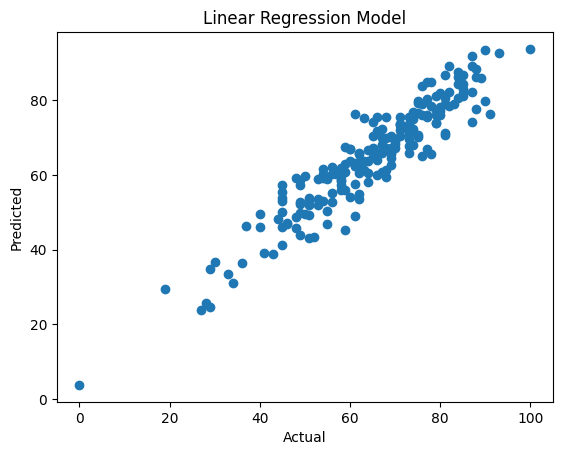

In [49]:
#for Linear

plt.scatter(y_test,y_pred_lin)
plt.xlabel("Actual")
plt.ylabel('Predicted')
plt.title("Linear Regression Model")

Text(0.5, 1.0, 'SVR Model')

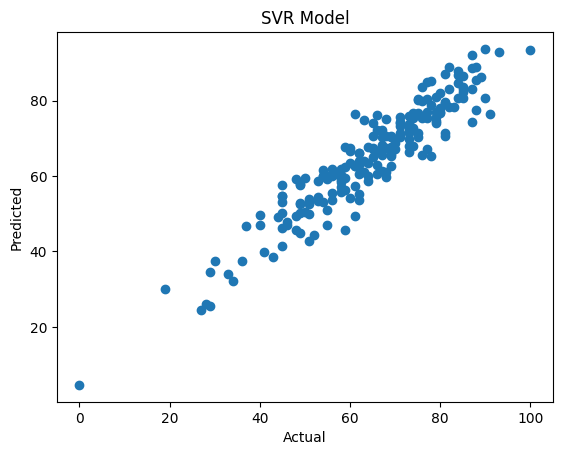

In [50]:
#for SVR

plt.scatter(y_test,y_pred_svr)
plt.xlabel("Actual")
plt.ylabel('Predicted')
plt.title("SVR Model")

## D/B Actual & Predicted Values

In [52]:
#For Linear Model

pred_df_lin=pd.DataFrame({'Actual Value': y_test,'Linear Predicted Value':y_pred_lin,'Difference':y_test-y_pred_lin})
pred_df_lin

,Actual Value,Linear Predicted Value,Difference
521,91,76.387970,14.612030
737,53,58.885970,-5.885970
740,80,76.990265,3.009735
660,74,76.851804,-2.851804
411,84,87.627378,-3.627378
...,...,...,...
408,52,43.409149,8.590851
332,62,62.152214,-0.152214
208,74,67.888395,6.111605
613,65,67.022287,-2.022287


In [53]:
#For SVR Model

pred_df_svr=pd.DataFrame({'Actual Value': y_test,'SVR Predicted Value':y_pred_svr,'Difference':y_test-y_pred_svr})
pred_df_svr

,Actual Value,SVR Predicted Value,Difference
521,91,76.549387,14.450613
737,53,58.551113,-5.551113
740,80,76.738639,3.261361
660,74,76.651907,-2.651907
411,84,87.893733,-3.893733
...,...,...,...
408,52,44.448047,7.551953
332,62,63.025334,-1.025334
208,74,68.050735,5.949265
613,65,67.365870,-2.365870
